# Project 1 by Giulio Benedetti

In [105]:
# Import necessary packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import binned_statistic
from scipy.signal import find_peaks
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

## Task 1: stochastic processes

In [106]:
# Set figure dimensions
plt.rcParams["figure.figsize"] = [12, 3]

A.

_Non-ergodicity in neuroscience_:

Non-ergodicity can be described as the lack of generalisability from a group of samples to individual samples. An ergodic stochastic process is characterised by a homogeneous and stationary individual-level variability. Inversely, a non-ergodic process violates one or both of these assumptions.

Mathematically, ergodicity (4) can be described as the condition in which the finite-ensemble and the finite-time averages of a stochastic process $x(t)$ converge as the number of realisations $N$ and the time interval $\Delta t$ approach infinity. The finite-ensemble average (1) corresponds to the typical mean of $x(t)$ across its $N$ realisations, whereas the finite-time average (2) is defined as the integral of $x(t)$ over the time interval $\Delta t$ divided by $\Delta t$. If $x$ changes at discrete intervals $\delta t$, (2) can be reduced to its discretised version over $N=\frac{\Delta t}{\delta t}$ realisations (3).

(1) Finite-ensemble average:
$\langle x(t) \rangle_N=\frac{1}{N}\sum_{i}^{N} x_i(t)$

(2) Finite-time average:
$\overline{X_{\Delta t}}=\frac{1}{\Delta t}\int_{t}^{t+\Delta t} x(s)ds$

(3) Discretised finite-time average:
$\overline{X_{\Delta t}}=\frac{1}{N\delta t}\sum_{i+1}^{N} x(t+i\delta t)$

(4) Condition for ergodicity:
$\lim_{N\to\infty}f_0\frac{1}{N}\sum_{i}^{N} X_i(t)=\lim_{N\to\infty}f_0\frac{1}{\Delta t}\int_{t}^{t+\Delta t} X(s)ds$

Biological systems undergo several physiological processes, such as aging and adaptation, that alter them over time (non-stationary) and across populations (inhomogeneous). Thus, the subject under investigation in most fields of biomedical science, including neuroscience, is typically non-ergodic. Relevant examples of non-ergodic physiological processes that might affect neuroscientific research include temporal fluctuations in neuronal spikes, hemodynamics and intracellular dynamics of single protein molecules. The first example is directly related to neural activation and questions the validity of the rate coding paradigm by emphasising the need for chain reactions and the input heterogeneity of neurons. The second example deals with non-ergodic blood flow and should be considered especially for techniques where the hemodynamic response is measured, such as fMRI. The third example affects neurons and any other cells at the sub-cellular level and raises intracellular evidence that cells themselves could be regarded as _non-ergodic machines_.

_Measuring non-ergodicity_:

The ergodicity of a dataset is usually quantified in terms ergodicity breaking, which conveys how quickly the finite-time average for a subset of participants converges to the finite-ensemble average for the entire subset, as the size of the subset increases. The formula described in Mangalam et al., 2021 represents one possible metric of ergodicity breaking, known as the Thirumalai-Mountain (TM) statistic. It is defined as the difference between the average squared subsample variance $\langle[\overline{\delta^2}(x(t))]^2\rangle$ and the total-sample squared variance $\langle\overline{\delta^2}(x(t)\rangle$ divided by the total-sample squared variance for a given time $t$:

(5) Ergodicity breaking:
$E_B(x(t))=(\langle[\overline{\delta^2}(x(t))]^2\rangle - \langle\overline{\delta^2}(x(t)\rangle) : \langle\overline{\delta^2}(x(t))\rangle^2$

Applications of this formula are exemplified in Figures 1b and 2d. In both figures, the x axis represents the end timepoint, that is, the number of samples included in the subset, while the y axis represents the dimensionless ergodicity breaking metric in terms of the TM statistic. In the first figure, the same physiological signal (human center of pressure displacement) is characterised by either Gaussian noise or fractality. The former behaves ergodically and thus converges to zero in the long run, whereas the latter is non-ergodic and thus fails to converge. In the second figure, ergodicity breaking is plotted over time for additive Gaussian noise, which appears ergodic since the value decreases as more timepoint are included in the computation. 

_Simpson Paradox_:

The Simpson Paradox describes the phenomenon in which the relationship between two variables at the level of individual samples (or groups) disappears or reverses at the group level (or set of groups). For example, the relationship between certain gut microbes and temperament in infants is often sex-dependent, and aggregating the male and female participants would likely produce a weak overall relationship (Aatsinki et al., 2019).

The Simpson Paradox represents a situation in which the group statistics differ from those of individual samples, thus violating at least the homogeneity assumption, from which non-ergodicity arises. Such divergence is often hidden in behavioural and psychological test performance, such as the speed-accuracy trade-off, where participants may differ in their solving strategies and the related variance of success.

_Scientific reproducibility and non-ergodicity_:

The authors point out that the application of ergodic statistics to non-ergodic processes leads to four problematic implications for the progress of scientific discovery. First, it exacerbates the reproducibility crisis and jeopardises the current efforts to deal with other issues, such as p-values and small sample sizes. Second, it makes it impossible to uncover the non-ergodic nature underlying certain biological processes. Third, it produces spurious results when testing hypotheses on non-linear and far-from-equilibrium dynamics, which are generally non-ergodic. Fourth, it restricts the range of new hypotheses that can be generated from a study to only those that fall in the ergodic domain. Taken altogether, authors conclude that non-ergodicity can inevitably compromise scientific research if further ignored. Thus, non-ergodic approaches should be adopted or integrated with current ergodic methods.

According to the authors, there are indeed solutions (or they could at least be developed) to analyse non-ergodic data. The first option involves using statistical methods that can take non-ergodicity into account at least partially, such as mixed-effects models, which are increasingly popular in multiple fields of biomedical science. The second option consists in transforming certain features of non-ergodic processes into ergodic observables, which can be then analysed with traditional ergodic methods. In my opinion, the solutions proposed by the authors are feasible and very promising to deal with non-ergodicity and avoid inflating the reproducibility crisis. However, while the authors place their odds especially towards the second option, which would keep the interpretation of results simple, I lean more towards the first option, in that I envision methods specifically designed for non-ergodic data and can thus become a safe standard choice for such data.

B.

In [107]:
data_dict = {}
for i in range(1, 4):
    data_dict["eeg" + str(i)] = pd.read_csv("eeg" + str(i) + ".csv", header=None).to_numpy()

In [108]:
time_average = np.mean(data_dict["eeg3"], axis=1)
ensemble_average = np.mean(data_dict["eeg3"], axis=0)

print(np.mean(time_average))
print(np.mean(ensemble_average))

-0.00033246705594603727
-0.00033246705594603765


In [109]:
plt.plot(range(500), data_dict["eeg3"].iloc[0, :])
plt.plot(range(500), ensemble_mean * np.ones(500), "r--")

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
ensemble_var = np.mean(np.var(data_dict["eeg3"], axis=1))
time_var = np.mean(np.var(data_dict["eeg3"], axis=0))
participant_vars = np.var(data_dict["eeg3"], axis=1)

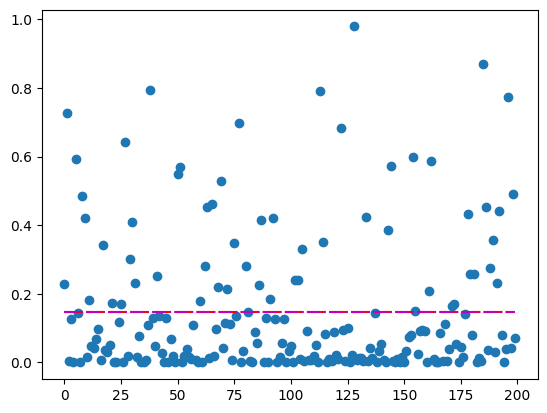

In [ ]:
plt.scatter(range(200), participant_vars)
plt.plot(range(200), ensemble_var * np.ones(200), "r--")
plt.plot(range(200), time_var * np.ones(200), "m-.")

In [ ]:
subsample_sizes = 2**np.linspace(2, 7, 6)

subsample_vars = {}
for i in subsample_sizes:
    sub_df = data_dict["eeg3"].iloc[:int(subsample_size), :]
    subsample_vars[i] = np.mean(np.var(sub_df, axis=1))

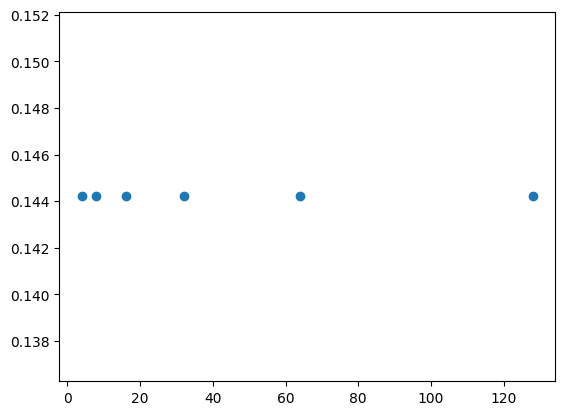

In [ ]:
plt.scatter(subsample_vars.keys(), subsample_vars.values())

In [ ]:
def ergodicity_breaking(mat, subrow_size, subcol_size, end_time):

    total_sample_var = np.mean(np.var(mat[:, :end_time], axis=1))

    idx = np.random.choice(mat.shape[0], subrow_size, replace=False)
    squared_diffs = np.diff(mat[idx, :end_time], axis=1)**2
    
    subsamples = np.array_split(squared_diffs, subcol_size, axis=1)
    sub_vars = np.array([np.mean(subsample, axis=1) for subsample in subsamples]).T
    
    avg_squared_sub_var = np.mean(sub_vars, axis=1)
    out = (np.mean(avg_squared_sub_var) - total_sample_var) / total_sample_var**2

    return out

In [ ]:
def plot_ergodicity(mat, subrow_range, subcol_range, time_range, axes, c, label=""):

    subrow_default = mat.shape[0]
    subcol_default = 10
    time_default = mat.shape[1]

    subrow_vals = [ergodicity_breaking(mat, x, subcol_default, time_default) for x in subrow_range]
    subcol_vals = [ergodicity_breaking(mat, subrow_default, y, time_default) for y in subcol_range]
    time_vals = [ergodicity_breaking(mat, subrow_default, subcol_default, z) for z in time_range]

    axes[0].plot(subrow_range, subrow_vals, c=c, label=label)
    axes[1].plot(subcol_range, subcol_vals, c=c, label=label)
    axes[2].plot(time_range, time_vals, c=c, label=label)
    

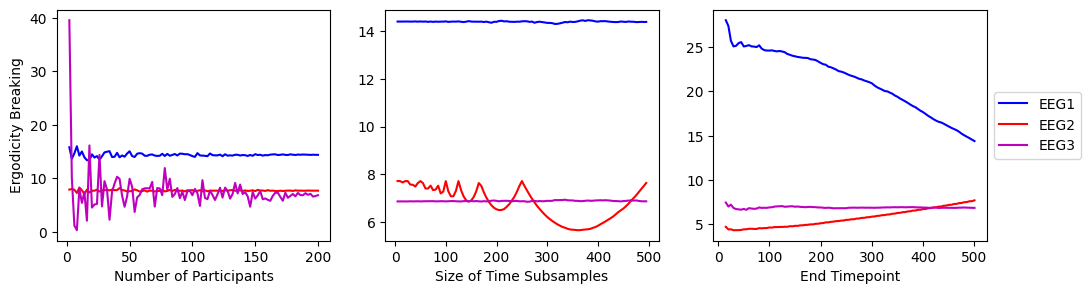

In [ ]:
subrow_range = np.arange(2, 201, 2)
subcol_range = np.arange(5, 501, 5)
time_range = np.arange(5, 501, 5)

fig, axes = plt.subplots(1, 3)

plot_ergodicity(data_dict["eeg1"], subrow_range, subcol_range, time_range, axes, c="b", label="EEG1")
plot_ergodicity(data_dict["eeg2"], subrow_range, subcol_range, time_range, axes, c="r", label="EEG2")
plot_ergodicity(data_dict["eeg3"], subrow_range, subcol_range, time_range, axes, c="m", label="EEG3")

axes[0].set_ylabel("Ergodicity Breaking")
axes[0].set_xlabel("Number of Participants")
axes[1].set_xlabel("Size of Time Subsamples")
axes[2].set_xlabel("End Timepoint")

axes[2].legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()

## Task 2: signal sampling and SNR

In this exercise, $\alpha$ waves with a frequency of 12 Hz and $\theta$ waves with a frequency of 6 Hz are simulated for two experimental setups to study the phases of sleep: EEG recordings in humans at a resolution of 10 ms and extracellular recordings in the mouse hippocampus at a resolution of 1 ms.

In [ ]:
# Set figure dimensions
plt.rcParams["figure.figsize"] = [12, 3]

A. The first setup is simulated with two concatenated sinusoidal curves that correspond to the $\alpha$ and $\theta$ waves, respectively.

In [ ]:
# Set experimental parameters
res = 1e-2
t = 4
f_alpha = 12
f_theta = 6

# Simulate signal with a sinusoidal curve
samples = np.arange(0, t, res)
signal_alpha = np.sin(2 * np.pi * f_alpha * samples[:len(samples)//2])
signal_theta = np.sin(2 * np.pi * f_theta * samples[len(samples)//2:])
signal = np.concatenate([signal_alpha, signal_theta])

The signals are visualised with an interpolated scatter plot.

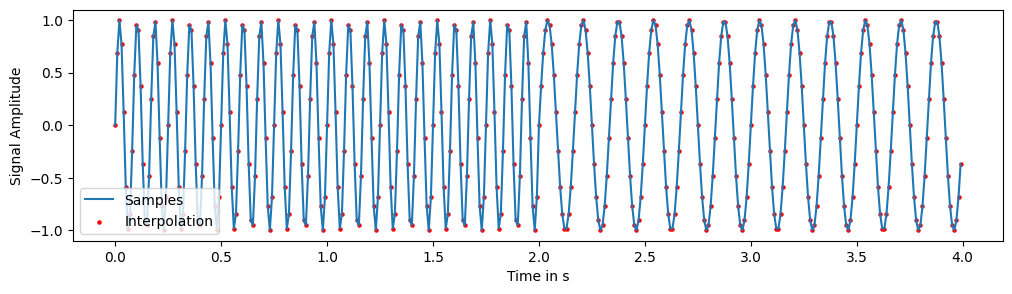

In [ ]:
# Visualise signal
plt.plot(samples, signal, label="Samples")
plt.scatter(samples, signal, s=5, c="r", label="Interpolation")

plt.xlabel("Time in s")
plt.ylabel("Signal Amplitude")
plt.legend(loc="lower left")

From the plot, it is possible to distinguish the two waves by their periodicity and frequency, whereby the first half of the signal shows a greater frequency (12 Hz) and corresponds to the $\alpha$ wave, whereas the second half shows a smaller frequency (6 Hz) and corresponds to the $\theta$ wave.

B. Next, the simulated signals are averaged by binning consecutive samples into groups of 4 or 5 samples. A function to perform binning is defined below.

In [ ]:
# Define function to bin samples
def make_bins(samples, signal, k, range=(0, 4)):

    bin_means, bin_edges, _ = binned_statistic(
        samples, signal,
        statistic="mean",
        bins=len(samples) // k,
        range=range
    )

    return (bin_means, bin_edges)

The signal is averaged bin-wise with a bin size of either 4 (left panel) or 5 (right panel) and results are visualised as an interpolated plot of the average signals.

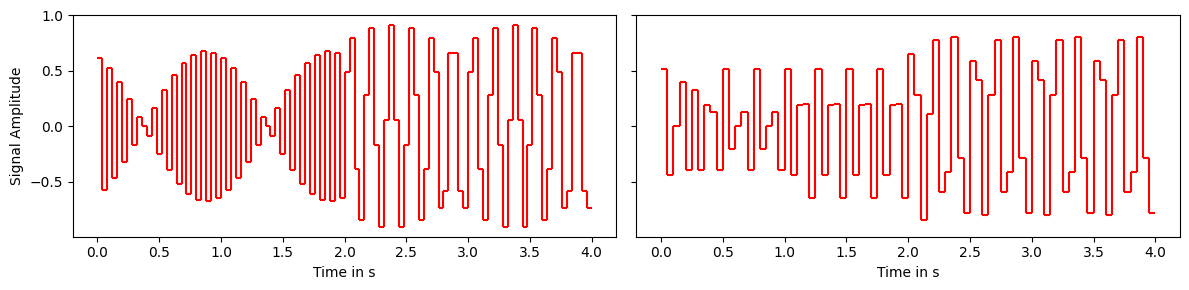

In [ ]:
# Bin samples in groups of 4 or 5
bin_means1, bin_edges1 = make_bins(samples, signal, 4)
bin_means2, bin_edges2 = make_bins(samples, signal, 5)

# Visualise binned signals
fig, axes = plt.subplots(1, 2, sharey=True)

axes[0].hlines(bin_means1, bin_edges1[:-1], bin_edges1[1:], colors="r")
axes[0].vlines(bin_edges1[1:-1], bin_means1[:-1], bin_means1[1:], colors="r")

axes[1].hlines(bin_means2, bin_edges2[:-1], bin_edges2[1:], colors="r")
axes[1].vlines(bin_edges2[1:-1], bin_means2[:-1], bin_means2[1:], colors="r")

axes[0].set_ylabel("Signal Amplitude")
axes[0].set_xlabel("Time in s")
axes[1].set_xlabel("Time in s")

plt.tight_layout()

In terms of frequencies, the 5-bin averaging (right panel) seems to perform better at discriminating the two phases of sleep compared to 4-bin averaging (left panel). In the left panel, the whole signal is reduced to a single frequency due to the effect of averaging, and thus the two waves get confused with one another. Reversely, it is still possible to differentiate the two waves in the right panel, even if they no longer oscillate with the original frequencies.

The performance of the two binning strategies is quantified in terms of frequenciy adherence and mean absolute error (MAE) with the two functions below.

In [142]:
# Define function to find frequency of binned signal
def find_freq(signal, k, res, height=None):

    if height == None:
        height = np.max(signal)

    peaks, _ = find_peaks(signal, height=height - 1e-6)
    period =  k * res * np.mean(np.diff(peaks))
    freq = 1 / period

    return freq

# Define function to compute the MAE of a binned signal
def MAE(signal, means, k):

    error = np.mean(np.abs((signal.reshape(-1, k) - means.reshape(-1, 1))))
    return error


As the first metric of performance, the adherence of binning to the original frequencies is inspected.

In [147]:
# Tabulate results on wave frequencies
tab = [["True Signal", f_alpha, f_theta],
       ["4-sample bins", find_freq(bin_means1[:50], 4, res), find_freq(bin_means1[50:], 4, res)],
       ["5-sample bins", find_freq(bin_means2[:40], 5, res), find_freq(bin_means2[40:], 5, res)]]

col_names = ["Alpha Wave (Hz)", "Beta Wave (Hz)"]

print(tabulate(tab, headers=col_names, floatfmt=".2f"))

                 Alpha Wave (Hz)    Beta Wave (Hz)
-------------  -----------------  ----------------
True Signal                12.00              6.00
4-sample bins               1.00              1.00
5-sample bins               4.00              2.00


From the table above, it appears that 4-sample binning distorts the original frequencies and it fails to separate the two waves because they are both reduced to a frequency of 1 Hz. Instead, 5-sample binning also distorts the original frequencies, but at least it maintains the relationship between them, that is, the frequency of $\alpha$ waves is still twice as large as that of $\theta$ waves, and thus it is possible to distinguish them.

In [70]:
# Tabulate results on MAEs
tab = [["Alpha MAE", MAE(signal[:200], bin_means1[:50], 4), MAE(signal[:200], bin_means2[:40], 5)],
       ["Theta MAE", MAE(signal[200:], bin_means1[50:], 4), MAE(signal[200:], bin_means2[40:], 5)],
       ["Total MAE", MAE(signal, bin_means1, 4), MAE(signal, bin_means2, 5)]]

col_names = ["4-sample bins", "5-sample bins"]

print(tabulate(tab, headers=col_names, floatfmt=".2f"))

             4-sample bins    5-sample bins
---------  ---------------  ---------------
Alpha MAE             0.44             0.53
Theta MAE             0.24             0.30
Total MAE             0.34             0.41


Interestingly, 4-sample binning returns a smaller MAE. This proves the importance of visualising the data and using an appropriate metric based on the analytical question. In this case, MAE does not seem to be a suitable metric to assess performance in separating waves with different frequencies.

C. Here, the averaged signal is plotted on top of the original signal and reasons for distortions in the original signal are discussed.

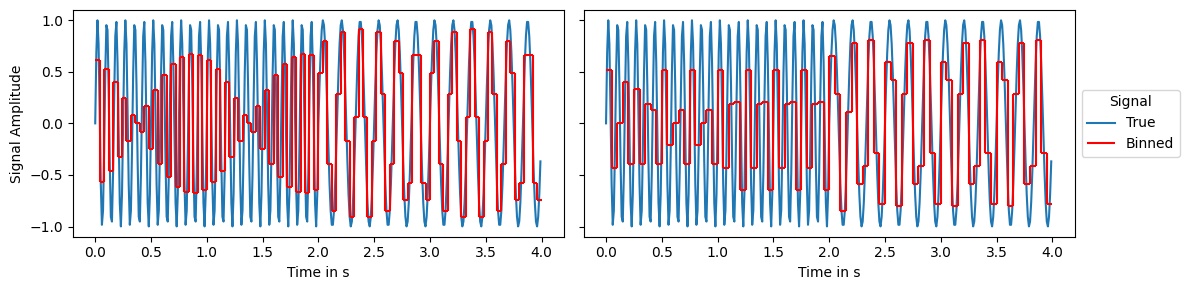

In [148]:
# Visualise binned signals in comparison with original signal
fig, axes = plt.subplots(1, 2, sharey=True)

axes[0].plot(samples, signal, label="Signal")
axes[0].hlines(bin_means1, bin_edges1[:-1], bin_edges1[1:], colors="r")
axes[0].vlines(bin_edges1[1:-1], bin_means1[:-1], bin_means1[1:], colors="r")

axes[1].plot(samples, signal, label="True")
axes[1].hlines(bin_means2, bin_edges2[:-1], bin_edges2[1:], colors="r", label="Binned")
axes[1].vlines(bin_edges2[1:-1], bin_means2[:-1], bin_means2[1:], colors="r")

axes[0].set_ylabel("Signal Amplitude")
axes[0].set_xlabel("Time in s")
axes[1].set_xlabel("Time in s")

axes[1].legend(title="Signal", loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()

The original signal can be distorted when sampled at a frequency that is a multiple of the original frequency, or when the sampling frequency is too small compared to the original frequency. In this case, A bin size of 4 (left panel) is an _unlucky_ choice because it periodically mixes up the samples in a way that generates the same frequency for both the original waves. Therefore, the two waves end up looking analogous and can be no longer differentiated. For a bin size of 5 (right panel), which is not a multiple of either of the original frequencies, the samples are grouped into bins that do distort the original signal, but in a different way for the two waves, and thus they can still be distinguished.  

D.

In [26]:
# Set experimental parameters
t = 2
res=1e-3

# Simulate signal with sinusoidal curve
samples = np.arange(0, t, res)
signal = np.sin(2 * np.pi * f_alpha * samples)

# Define phase range of noise
phase_range = np.linspace(0, 2 * np.pi, 100)

In [23]:
# Define function to add noise to the signal
def add_noise(samples, signal, phase_range, f_noise=50, ratio=0.1):

    noise_phase = np.random.choice(phase_range)
    noise = np.sin(2 * np.pi * f_noise * samples + noise_phase) / ratio
    noisy_signal = signal + noise

    return noisy_signal, noise

# Define function to compute SNR
def compute_snr(signal, noise):
    
    snr = np.log10(np.mean(np.abs(signal)) / np.mean(np.abs(noise)))
    return snr

SNR: -1.00dB


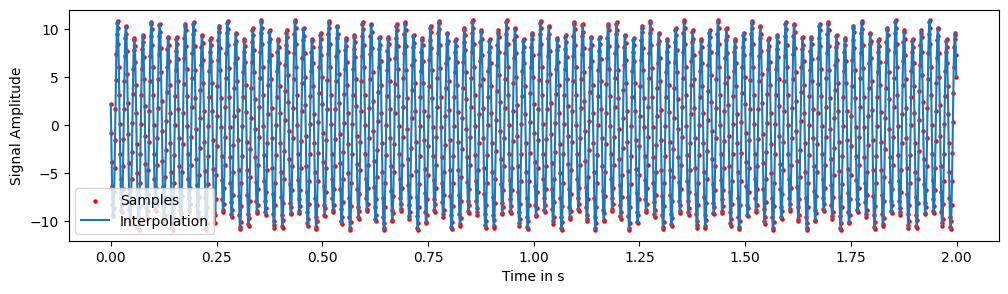

In [30]:
# Add noise to the signal
noisy_signal, noise = add_noise(samples, signal, phase_range, ratio=0.1)

print(f"SNR: {compute_snr(signal, noise):.2f}dB")

# Visualise signal
plt.scatter(samples, noisy_signal, s=5, c="r", label="Samples")
plt.plot(samples, noisy_signal, label="Interpolation")

plt.xlabel("Time in s")
plt.ylabel("Signal Amplitude")
plt.legend(loc="lower left")

E.

In [31]:
def simulate_experiment(n, samples, signal, phase_range):

    trials = []
    for trial in range(n):
        noisy_signal, _ = add_noise(samples, signal, phase_range)
        trials.append(noisy_signal)

    average_signal = np.mean(np.array(trials), axis=0)
    average_noise = average_signal - signal

    return average_signal, average_noise

SNR: -0.77dB


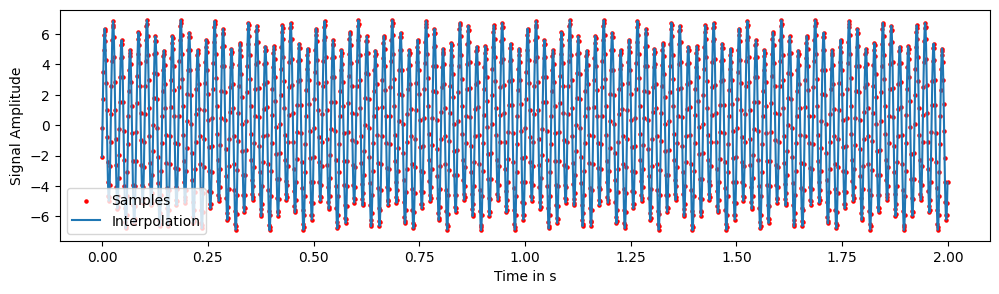

In [32]:
average_signal, average_noise = simulate_experiment(5, samples, signal, phase_range)
print(f"SNR: {compute_snr(signal, average_noise):.2f}dB")

plt.scatter(samples, average_signal, s=5, c="r", label="Samples")
plt.plot(samples, average_signal, label="Interpolation")

plt.xlabel("Time in s")
plt.ylabel("Signal Amplitude")
plt.legend(loc="lower left")

Text(0, 0.5, 'SNR (dB)')

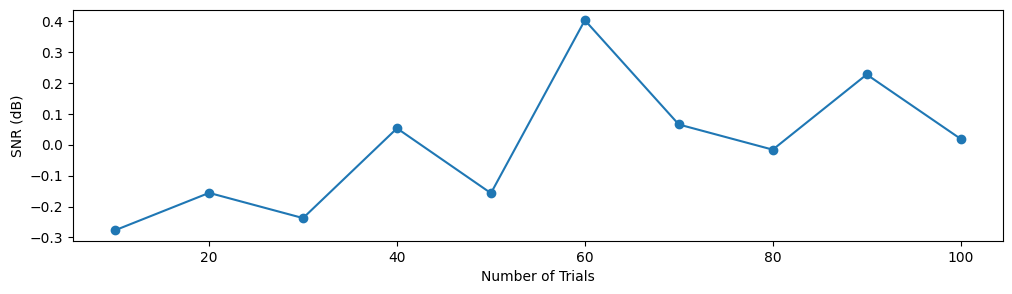

In [33]:
trials = np.linspace(10, 100, 10)
snrs = list(map(
    lambda n: compute_snr(signal, simulate_experiment(int(n), samples, signal, phase_range)[1]),
    trials
))

plt.scatter(trials, snrs)
plt.plot(trials, snrs)

plt.xlabel("Number of Trials")
plt.ylabel("SNR (dB)")

Number of trials above 100, ideally from 150 on more likely to give SNR => 0.

## Task 3: firing rates and convolution

In this exercise, a neuronal spike train is averaged with various types of windows: non-sliding, sliding square and Gaussian windows. Results for the different methods are compared and discussed.

In [ ]:
# Set figure dimensions
plt.rcParams["figure.figsize"] = [10, 3]

A. The data is initially imported and converted to a numpy array for easy manipulation.

In [ ]:
# Import and tidy up data
spike_df = pd.read_csv("spike_times.csv", header=None).T
spike_df.columns = ["Time"]
spike_arr = spike_df["Time"].to_numpy()

The mean firing rate is known as _spike count rate_ and can be calculated with the formula $r(t) = \frac{number of spikes}{\Delta t}$ over the entire time period.

In [ ]:
# Compute mean firing rate
firing_rate = len(spike_arr) / spike_arr[-1]
print(f"Mean firing rate: {firing_rate:.2f} spikes/s")

Mean firing rate: 32.91 spikes/s


B.　The first averaging method involves a non-sliding window, which is generated by the function defined below.

In [ ]:
# Define function for computing and plotting firing rates with non-sliding window
def plot_window(spike_df, window, colors):
    
    edges = np.arange(0, 10.1, window)

    spike_df["Interval"] = np.floor(spike_df["Time"] / window).astype(int)
    spikes = spike_df.groupby("Interval")["Time"].count().to_numpy()

    if len(spikes) == len(edges):
        spikes = spikes[:-1]

    # Convert numbers of spikes to firing rates
    firing_rates = spikes / window

    plt.hlines(firing_rates, edges[:-1], edges[1:], colors=colors, label=window)
    plt.vlines(edges[1:-1], firing_rates[:-1], firing_rates[1:], colors=colors)

The average firing rates for window sizes of 0.2, 0.5, 1 and 3 seconds are then plotted jointly.

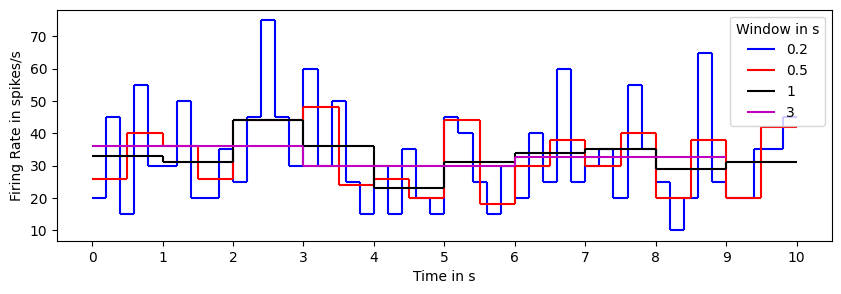

In [ ]:
# Plot firing rates for different window sizes
plot_window(spike_df, 0.2, "b")
plot_window(spike_df, 0.5, "r")
plot_window(spike_df, 1, "k")
plot_window(spike_df, 3, "m")

plt.xlabel("Time in s")
plt.ylabel("Firing Rate in spikes/s")
plt.xticks(range(11))
plt.legend(title="Window in s")

Clearly, results are largely affected by variations in window size when using a non-sliding window. While the 0.2 and to a less extent the 0.5-second long windows still retain some information about the original spikes, windows equal or greater than 1 second no longer do due to the effect of averaging over such a wide time interval. Overall, for the given signal a shorter non-sliding window may be preferred over a longer one.

C. In this section, square sliding windows of various sizes are experimented.

In [ ]:
# Check that no two spikes happen in the same millisecond (if so train should not be binary)
step = 0.001
samples = np.arange(0, 10 + step, step)
spike_arr = np.round(spike_arr, 3)
train = np.isin(samples, spike_arr).astype(int)

The second averaging method consists of a convolution between the spike train and a normalised square sliding window, whose size and resolution can be adjusted with the function below.

In [ ]:
# Define function for computing and plotting firing rates with sliding square window
def plot_square(train, samples, window_size, c, step=0.001, mode="same"):

    window = np.ones(int(window_size / step))
    window /= sum(window)

    firing_rates = np.convolve(train, window, mode) / step

    plt.plot(samples, firing_rates, c=c, label=window_size)

Again, average firing rates are plotted for window sizes of 0.2, 0.5, 1 and 3 seconds. However, average firing rates are calculated every time the window slides forward by 1 millisecond.

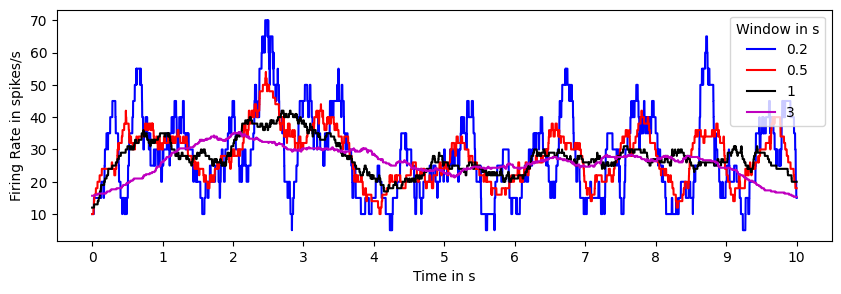

In [ ]:
# Plot firing rates for different window sizes
plot_square(train, samples, 0.2, "b")
plot_square(train, samples, 0.5, "r")
plot_square(train, samples, 1, "k")
plot_square(train, samples, 3, "m")

plt.xlabel("Time in s")
plt.ylabel("Firing Rate in spikes/s")
plt.xticks(range(11))
plt.legend(title="Window in s", loc="upper right")

Also in the case of a sliding square window, results show strong sensitivity to the used window size, although they seem to maintain more information on the variable nature of the neuron than with a non-sliding window. In particular, the 0.5-second long window exhibited a relatively good signal-to-noise ratio, whereas the shorter window featured greater noise, and the longer ones were more biased towards the average firing rate and thus contained less information.


D.　The third averaging method entails a convolution between the spike train and a normalised Gaussian sliding window, whose span and standard deviation can be adjusted with the function below.

In [ ]:
# Define function to calculate normal probability density of a quantile
def gaussian(x, mu=0, sigma=1):
    p = np.exp(-(x - mu)**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
    return p

# Define function for computing and plotting firing rates with sliding normal window
def plot_gaussian(train, window_size, window_std, c, step=0.001):
    
    a = np.arange(0, window_size + step, step) - window_size / 2
    window = gaussian(a, sigma=window_std)
    window /= sum(window)

    firing_rates = np.convolve(train, window, "same") / step
    plt.plot(samples, firing_rates, c=c, label=f"m: {window_size}s, std: {window_std}s")


Average firing rates are now plotted over two gaussian sliding windows: with spans of 0.8 and 0.45 seconds and standard deviations of 0.25 and 0.1 seconds, respectively. As before, the windows slide forward every time by 1 millisecond.

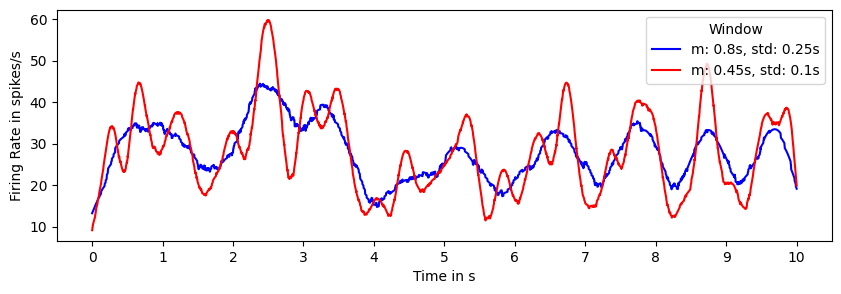

In [ ]:
# Plot firing rates for different window spans and standard deviations
plot_gaussian(train, 0.8, 0.25, c="b")
plot_gaussian(train, 0.45, 0.1, c="r")

plt.xlabel("Time in s")
plt.ylabel("Firing Rate in spikes/s")
plt.xticks(range(11))
plt.legend(title="Window", loc="upper right")

Also for a Gaussian window, its size largely determines the shape of the resulting curve. In addition, the standard deviation can also be adjusted for this type of window. It appears that a Gaussian window with greater size and standard deviation produces a more smoothed curve due to probabilities being more broadly distributed over the window size. Vice versa, smaller size and stadard deviation seem more sensitive to peaks and drops in the firing rate, and encodes greater variability in the amplitude of the firing rates.

E. Differences between windows of the same type (non-sliding, sliding square and Gaussian) were already addressed above in the respective sections. Here, comparisons are drawn _across_ the three types of windows. Generally, sliding windows provide better robustness and interpretability of results. Compared to non-sliding windows, they can return a greater diversity and a more dynamic change of amplitude values, which is more realistic than highly discretised bins typically produced by non-sliding windows. In the case of sliding windows, a large window size provides smoother and better resolved amplitude values. However, they might also excessively flatten the original signal due to the effect of averaging over a very wide time interval. In conclusion, sliding windows likely represent the preferred solution, because convolution returns more gradual and thus interpretable changes in amplitude. There is a great variety of window types, sizes and weight distributions, thus such choice should be guided by the research question.

## Task 4: tuning curves

In [ ]:
# Set figure dimensions
plt.rcParams["figure.figsize"] = [8, 4]

A.

In [2]:
data_dict = {}
for i in "ABCD":
    data_dict[i] = pd.read_pickle("q1_neuron" + i + ".pkl")

matA = data_dict["A"]

print(f"Conditions: {matA.shape[0]}, Trials: {matA.shape[1]}, Timepoints: {matA.shape[2]}")

stimulus_start = 200
stimulus_end = 600

Conditions: 6, Trials: 50, Timepoints: 1000


In [20]:
def tuning_curve(mat, control_range, treat_range, c, label=""):

    pre_signal = mat[:, :, control_range]
    post_signal = mat[:, :, treat_range]

    mean_pre_signal = np.mean(np.mean(pre_signal, axis=1), axis=1)
    mean_post_signal = np.mean(np.mean(post_signal, axis=1), axis=1)
    norm_post_signal = mean_post_signal / mean_pre_signal

    plt.plot(range(6), norm_post_signal, c=c, label=label)
    plt.scatter(range(6), norm_post_signal, c=c)

Text(0, 0.5, 'Normalised Response')

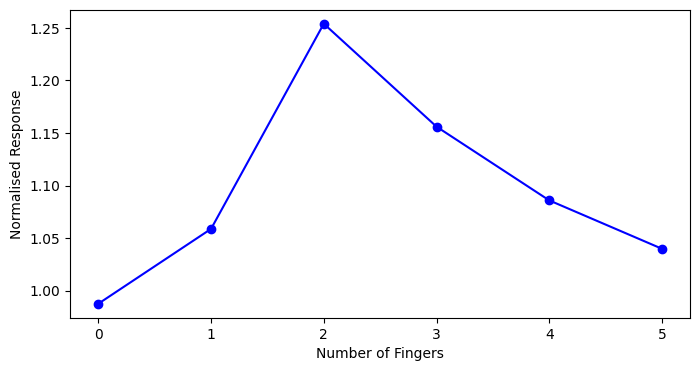

In [32]:
control_range = range(stimulus_start)

tuning_curve(matA, control_range, range(stimulus_start, matA.shape[2]), c="b")

plt.xlabel("Number of Fingers")
plt.ylabel("Normalised Response")

B.

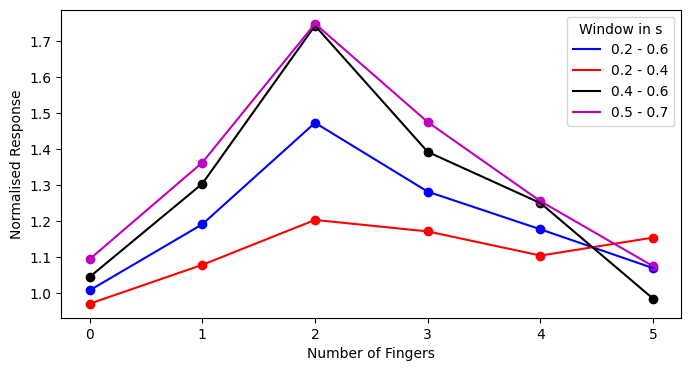

In [33]:
tuning_curve(
    matA, control_range,
    range(stimulus_start, stimulus_end),
    c="b", label="0.2 - 0.6"
)

tuning_curve(
    matA, control_range,
    range(stimulus_start, stimulus_end - 200),
    c="r", label="0.2 - 0.4"
)

tuning_curve(
    matA, control_range,
    range(stimulus_start + 200, stimulus_end),
    c="k", label="0.4 - 0.6"
)

tuning_curve(
    matA, control_range,
    range(stimulus_start + 100, stimulus_end - 100),
    c="m", label="0.5 - 0.7"
)

plt.xlabel("Number of Fingers")
plt.ylabel("Normalised Response")
plt.legend(title="Window in s")

C.

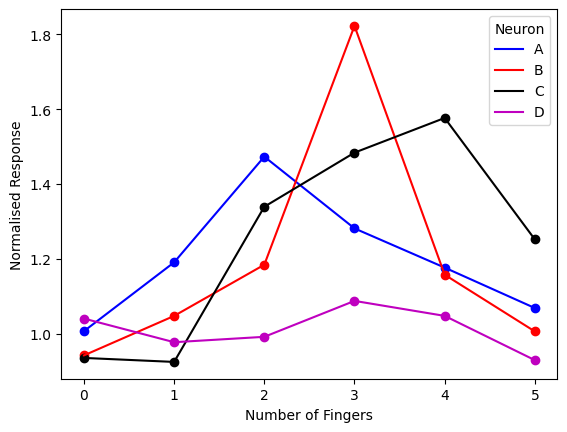

In [10]:
treat_range = range(stimulus_start, stimulus_end)

tuning_curve(data_dict["A"], control_range, treat_range, c="b", label="A", )
tuning_curve(data_dict["B"], control_range, treat_range, c="r", label="B")
tuning_curve(data_dict["C"], control_range, treat_range, c="k", label="C")
tuning_curve(data_dict["D"], control_range, treat_range, c="m", label="D")

plt.xlabel("Number of Fingers")
plt.ylabel("Normalised Response")
plt.legend(title="Neuron")

D.

In [11]:
matX = pd.read_pickle("q1_decode_data.pkl")

pre_signal = matX[:, control_range]
post_signal = matX[:, treat_range]

responses = np.mean(post_signal, axis=1) / np.mean(pre_signal, axis=1)
guesses = [2, 3, 2, 3]
colors = ["b", "r", "k", "m"]

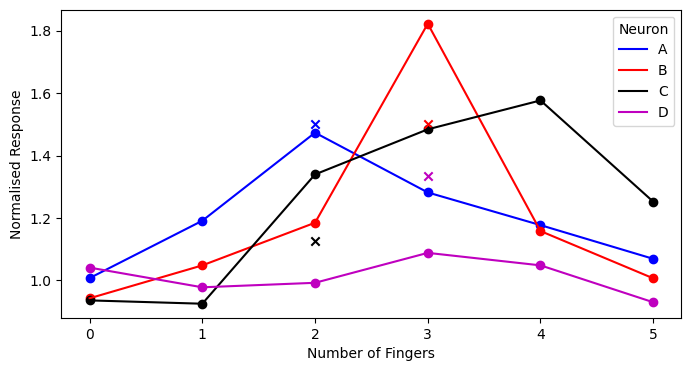

In [34]:
tuning_curve(data_dict["A"], control_range, treat_range, c="b", label="A")
tuning_curve(data_dict["B"], control_range, treat_range, c="r", label="B")
tuning_curve(data_dict["C"], control_range, treat_range, c="k", label="C")
tuning_curve(data_dict["D"], control_range, treat_range, c="m", label="D")

for i in range(len(responses)):
    plt.scatter(guesses[i], responses[i], c=colors[i], marker="x")

plt.xlabel("Number of Fingers")
plt.ylabel("Normalised Response")
plt.legend(title="Neuron")

In [38]:
res = {"Neuron": ["A", "B", "C", "D"], "Response": responses, "Guess": guesses}

print(tabulate(res, headers=col_names, floatfmt=".2f"))

Neuron      Response    Guess
--------  ----------  -------
A               1.50        2
B               1.50        3
C               1.12        2
D               1.33        3


## Bibliography

- Aatsinki, Anna-Katariina, et al. "Gut microbiota composition is associated with temperament traits in infants." Brain, behavior, and immunity 80 (2019): 849-858.
- Mangalam, Madhur, and Damian G. Kelty-Stephen. "Point estimates, Simpson’s paradox, and nonergodicity in biological sciences." Neuroscience & Biobehavioral Reviews 125 (2021): 98-107.